In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scripts.game import play
from scripts.players import RandomPlayer, LeftPlayer, LearnerPlayer

### Learner vs Random Strategy

Both the Learner and the player who adopts the random strategy play against the player who always chooses the free field with the smallest number (naive strategy). The players who adopt the strategies under study play first in each game. The strategies are compared in terms of games not won (either lost or drawn).

In [7]:
SEED = 42
player1 = LearnerPlayer()
player2 = LeftPlayer()
player3 = RandomPlayer()
player4 = LeftPlayer()

numgames = 10000
np.random.seed(SEED)
results_learner = np.array([])
results_random = np.array([])
for i in tqdm(range(numgames)):
    ret_learner = play(player1, player2)
    results_learner = np.append(results_learner, ret_learner)
    ret_random = play(player3, player4)
    results_random = np.append(results_random, ret_random)

100%|██████████| 10000/10000 [00:28<00:00, 350.40it/s]


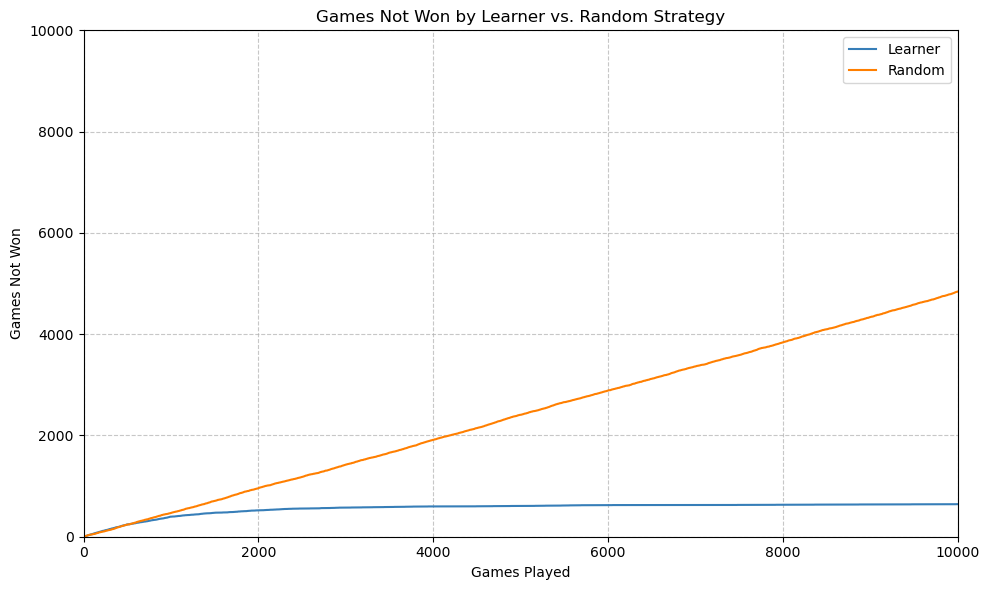

In [9]:
won_learner = np.zeros_like(results_learner)
won_learner[results_learner == 1] = 1
won_random = np.zeros_like(results_random)
won_random[results_random == 1] = 1
played = np.arange(1, numgames+1)
games_not_won_learner = played - np.cumsum(won_learner)
games_not_won_random = played - np.cumsum(won_random)
plt.figure(figsize=(10, 6))
plt.plot(played, games_not_won_learner, label='Learner', color='#377eb8')
plt.plot(played, games_not_won_random, label='Random', color='#ff7f00')
plt.xlabel('Games Played')
plt.ylabel('Games Not Won')
plt.title('Games Not Won by Learner vs. Random Strategy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, numgames)
plt.ylim(0, numgames)
plt.tight_layout()
plt.show()